1.

A company has gathered data on salaries, company names, job roles, and educational qualifications of employees. The dataset includes information about whether each employee's salary exceeds $100k (1) or not (0). Using this data, the company aims to build a decision tree classification model to predict whether a new employee, based on their company, job role, and degree, is likely to have a salary exceeding $100k.




In [736]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [737]:
data_salary=pd.read_csv('salaries.csv')



In [738]:
data_salary.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [739]:
data_salary.isna().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [740]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [741]:
data_salary.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


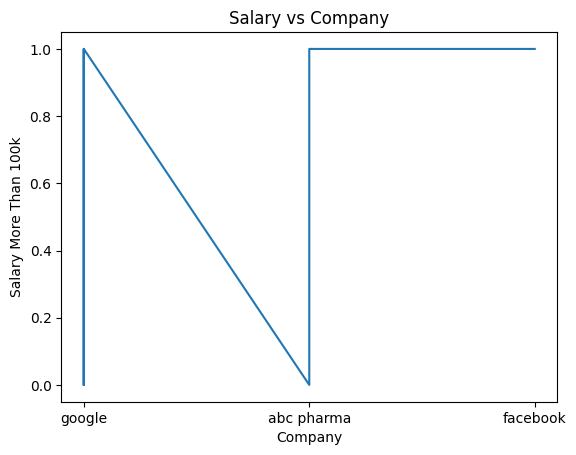

In [742]:
plt.plot(data_salary['company'], data_salary['data_salary'])
plt.xlabel('Company')
plt.ylabel('Salary More Than 100k')
plt.title('Salary vs Company')
plt.show()

In [743]:
encoder=LabelEncoder()
data_salary['Encoded_company']=encoder.fit_transform(data_salary['company'])
data_salary['Encoded_job']=encoder.fit_transform(data_salary['job'])
data_salary['Encoded_degree']=encoder.fit_transform(data_salary['degree'])

In [745]:
X=data_salary[['Encoded_company','Encoded_job','Encoded_degree']]
y=data_salary['salary_more_then_100k']

In [761]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [762]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [763]:

from sklearn.model_selection import GridSearchCV


dt_clf = DecisionTreeClassifier(max_depth=3,random_state=42)
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)



/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [764]:

from sklearn.metrics import accuracy_score
best_dt_clf = grid_search.best_estimator_
y_pred = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.8


In [765]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, variance = bias_variance_decomp(
    estimator=best_dt_clf,
    X_train=X_train.values,  
    y_train=y_train.values,  
    X_test=X_test.values,    
    y_test=y_test.values,    
    random_seed=42,
    loss='mse'
)

print("Mean Squared Error (MSE):", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error (MSE): 0.377
Bias: 0.19366499999999998
Variance: 0.183335


2.
In this file using following columns build a model to predict if person would survive or not,PclassSexAgeFareCalculate score of your model

In [605]:
df_titanic=pd.read_csv('titanic.csv')

In [606]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [607]:
df_titanic.shape

(891, 12)

In [608]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [609]:
df_titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [610]:
df_titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [611]:
df_titanic.Embarked=df_titanic.Embarked.fillna('S')

In [612]:
df_titanic.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [613]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [614]:
df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch']
df_titanic['FarePerPerson'] = df_titanic['Fare'] / (df_titanic['FamilySize'] + 1)
df_titanic['AgeGroup'] = pd.cut(df_titanic['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
df_titanic = df_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age', 'Fare'], axis=1)

In [686]:
df_titanic.isna().sum()

Survived                0
Pclass                  0
FamilySize              0
FarePerPerson           0
Sex_female              0
Sex_male                0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
AgeGroup_Child          0
AgeGroup_Teenager       0
AgeGroup_Young Adult    0
AgeGroup_Adult          0
AgeGroup_Senior         0
dtype: int64

/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

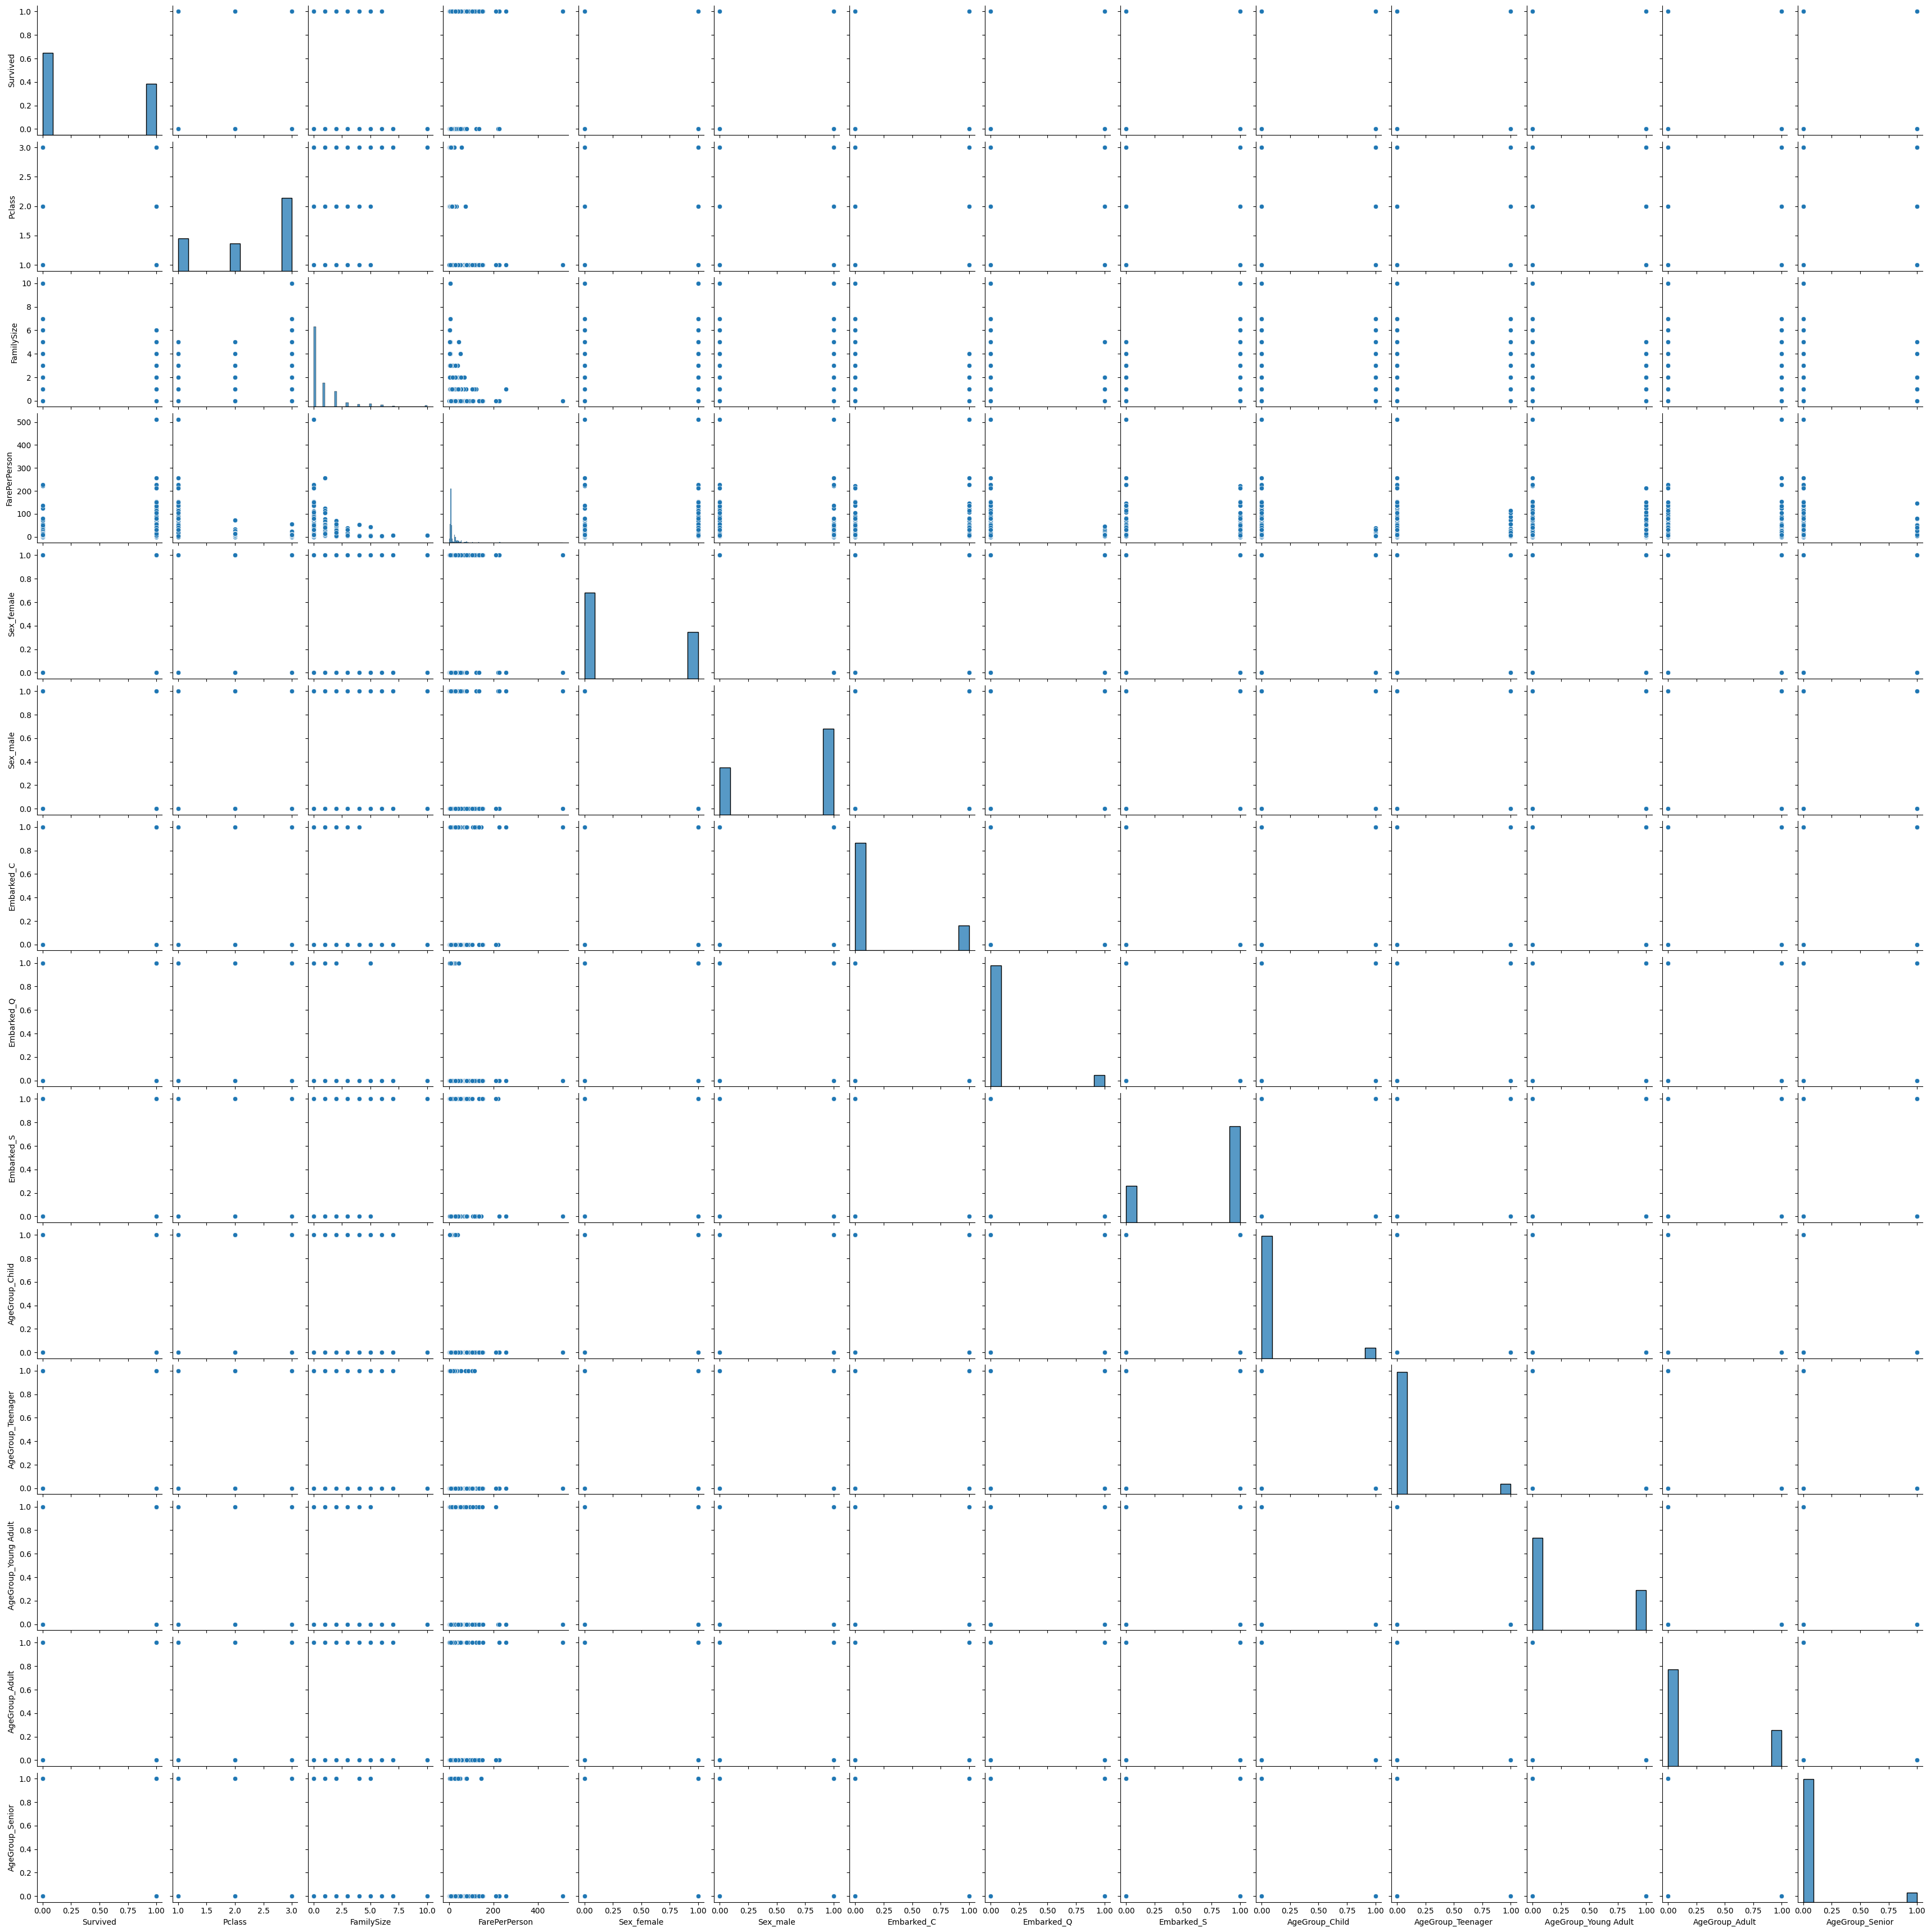

In [689]:
sns.pairplot(df_titanic)

In [615]:
df_titanic = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked', 'AgeGroup'])


In [616]:
df_titanic.head()

,Survived,Pclass,FamilySize,FarePerPerson,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,1,3.62500,False,True,False,False,True,False,False,True,False,False
1,1,1,1,35.64165,True,False,True,False,False,False,False,False,True,False
2,1,3,0,7.92500,True,False,False,False,True,False,False,True,False,False
3,1,1,1,26.55000,True,False,False,False,True,False,False,False,True,False
4,0,3,0,8.05000,False,True,False,False,True,False,False,False,True,False


In [662]:

X = df_titanic.drop(columns=['Survived']) 
y = df_titanic['Survived']


In [673]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [674]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}



In [675]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)


In [676]:

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                                              min_samples_leaf=2,
                                              min_samples_split=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [677]:
best_clf = grid_search.best_estimator_


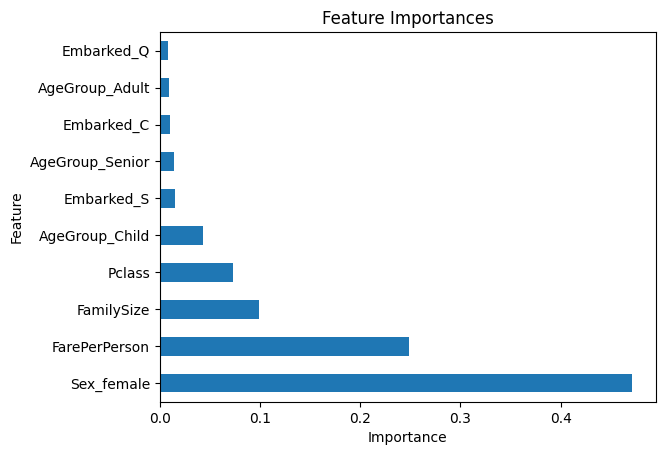

In [678]:
feat_importances = pd.Series(best_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [679]:
X_test.shape

(179, 13)

In [680]:
y_pred = best_clf.predict(X_test)

In [681]:
y_pred1=best_clf.predict(X_train)

In [682]:
from sklearn.metrics import classification_report
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train,y_pred1)
print("Accuracy_test:", accuracy_test)
print("Accuracy_train:",accuracy_train)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy_test: 0.8379888268156425
Accuracy_train: 0.8441011235955056

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       110
           1       0.87      0.68      0.76        69

    accuracy                           0.84       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



In [683]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, variance = bias_variance_decomp(
    estimator=best_clf,
    X_train=X_train.values,  
    y_train=y_train.values,  
    X_test=X_test.values,    
    y_test=y_test.values,    
    random_seed=0,
    loss='mse'
)
print("Mean Squared Error (MSE):", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error (MSE): 0.18807262569832403
Bias: 0.11918310055865922
Variance: 0.0688895251396648


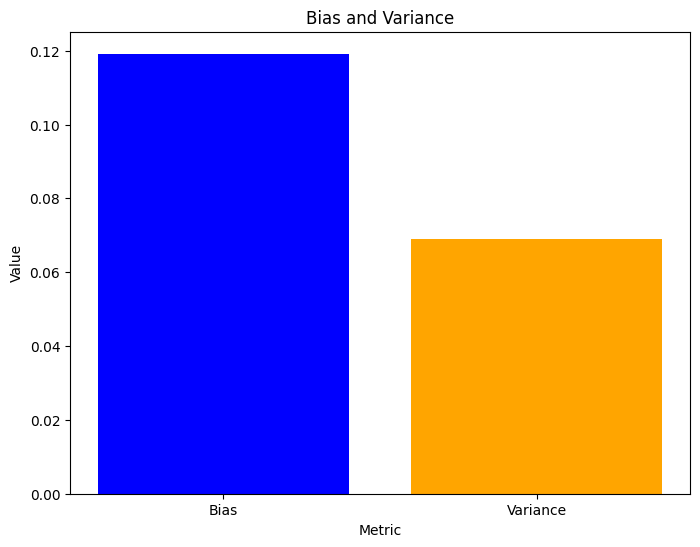

In [685]:
bias = 0.11918310055865922
variance =  0.0688895251396648

plt.figure(figsize=(8, 6))
plt.bar(['Bias', 'Variance'], [bias, variance], color=['blue', 'orange'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Bias and Variance')
plt.show()